# 1D Heat (Diffusion) Equation – Explicit Scheme

We solve the 1D heat equation:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < L, \quad t > 0
$$

- $\alpha$ is the thermal diffusivity.
- $u(x, t)$ is the temperature at position $x$ and time $t$.

---

## Explicit Finite Difference Scheme

Using forward Euler in time and central difference in space, we get:

$$
u_i^{n+1} = u_i^n + \frac{\alpha \Delta t}{(\Delta x)^2} \left( u_{i+1}^n - 2 u_i^n + u_{i-1}^n \right)
$$

- $i$ = spatial index  
- $n$ = time index  
- Stability condition (CFL):

$$
\frac{\alpha \Delta t}{(\Delta x)^2} \le 0.5
$$

---

## Boundary and Initial Conditions

- Dirichlet boundaries: $u(0,t) = u(L,t) = 0$  
- Initial condition: $u(x,0) = \sin(\pi x / L)$

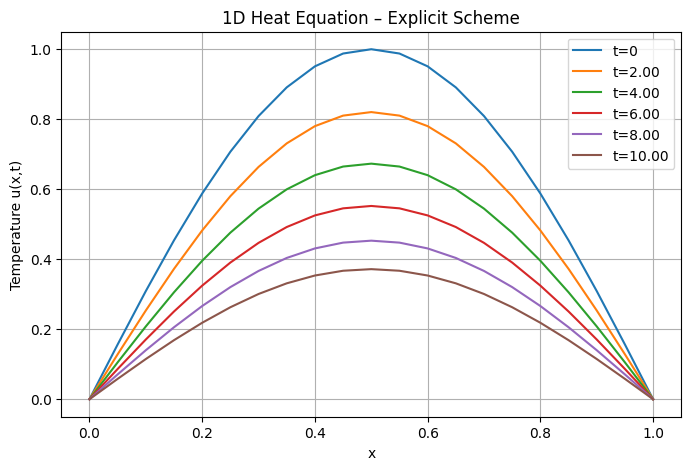

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0            # length of the rod
alpha = 0.01       # thermal diffusivity
Nx = 20            # number of spatial points
dx = L / Nx
dt = 0.4 * dx**2 / alpha  # CFL condition
Nt = 100           # number of time steps

# Spatial grid
x = np.linspace(0, L, Nx+1)

# Initial condition
u = np.sin(np.pi * x / L)
u_new = u.copy()

# Prepare plot
plt.figure(figsize=(8,5))
plt.plot(x, u, label="t=0")

# Time-stepping loop
for n in range(1, Nt+1):
    for i in range(1, Nx):
        u_new[i] = u[i] + alpha*dt/dx**2 * (u[i+1] - 2*u[i] + u[i-1])
    u[:] = u_new[:]
    
    # Plot every 20 steps
    if n % 20 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

plt.xlabel("x")
plt.ylabel("Temperature u(x,t)")
plt.title("1D Heat Equation – Explicit Scheme")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- The explicit finite difference method accurately simulates the 1D heat equation for small enough time steps.  
- Stability is controlled by the CFL condition: $\alpha \Delta t / (\Delta x)^2 \le 0.5$.  
- For larger time steps, the method becomes unstable (oscillations or blow-up).  
- This notebook demonstrates time evolution of the temperature profile along a rod with Dirichlet boundary conditions.